In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

## Box Plots

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. This offers general information abbout a group of data's symmetry, skew, variance and outliers.

- df.plot(kind='box')

In this lesson, we will look at the distribution of salaries for data scientists, data engineers and data analysts.
- x axis: salary
- y axis: job_title_short

In [3]:

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
# only focus on DA jobs in the US
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
# drop NaN values in the column we are going to plot
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


We can now call the plot method on this, sepcifically for the 'salary_year_avg' column:

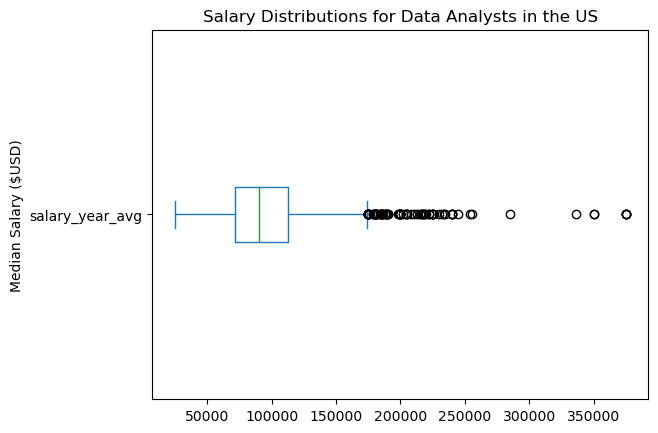

In [7]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)
plt.title('Salary Distributions for Data Analysts in the US')
plt.ylabel('Median Salary ($USD)')
plt.show()

# for matplotlib: plt.boxplot(['salary_year_avg'])

#### Interpretation:

- The median salary for data analysts appears to lie under $100,000
- The interquartile range spans from approximately $65,000 (lower quartile) to $125,000 (upper quartile), representing where 50% of the data lies
-  The lines extending from the box (whiskers) suggest the range of typical salaries beyond the IQR. The lower whisker extends below $50000, indicating the minum typical salary. COnversely, the upper wisker goes up to about $175,000, suggesting this is the maximum typical salary before outliers are introduced
- There are several outliers above the upper wisker, ranging up to approximately $350,000, indicating salaries that are unusually high compared to the general distribution

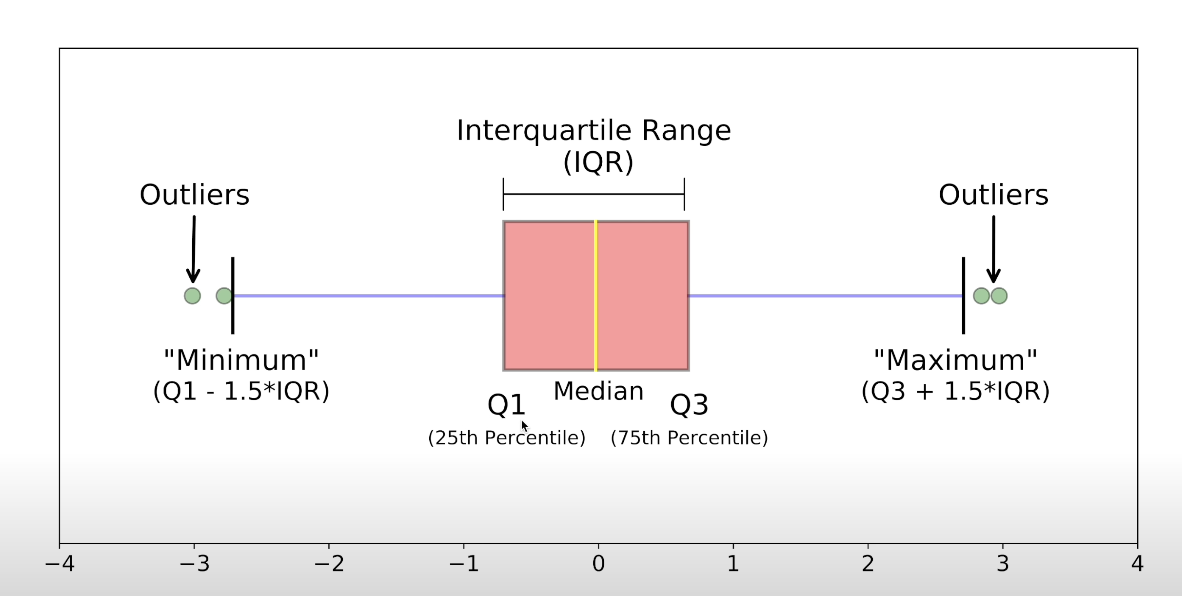

-Remeber, everything between the 25th and 75th percentile represents 50% of the data
-From the box plot we generated above, we can see that there are many outliers to the right of the plot outside of the 'maximum' (although this is not the true maximum value in the dataset). 

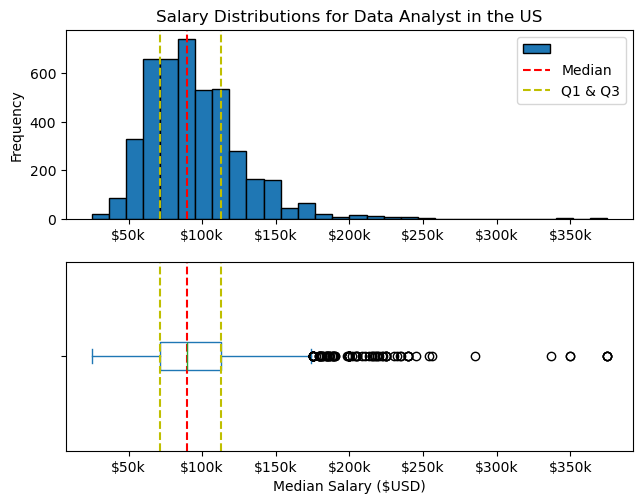

In [6]:
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()

### Salary Distributions amongst Data Scientists, Data Engineers and Data Scientists

In [9]:
job_titles= ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_data = df[(df['job_title_short'].isin (job_titles)) & (df['job_country'] == 'United States')]
df_data.head(6)

# here, we create a list to filter for the relevant data jobs only in the US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None


In [11]:
df_data = df_data.dropna(subset='salary_year_avg')
df_data.head(6)

# here, we drop NaN values in the 'salary_year_avg' column

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"


Text(0.5, 0.98, 'Salary Distributions in the United States')

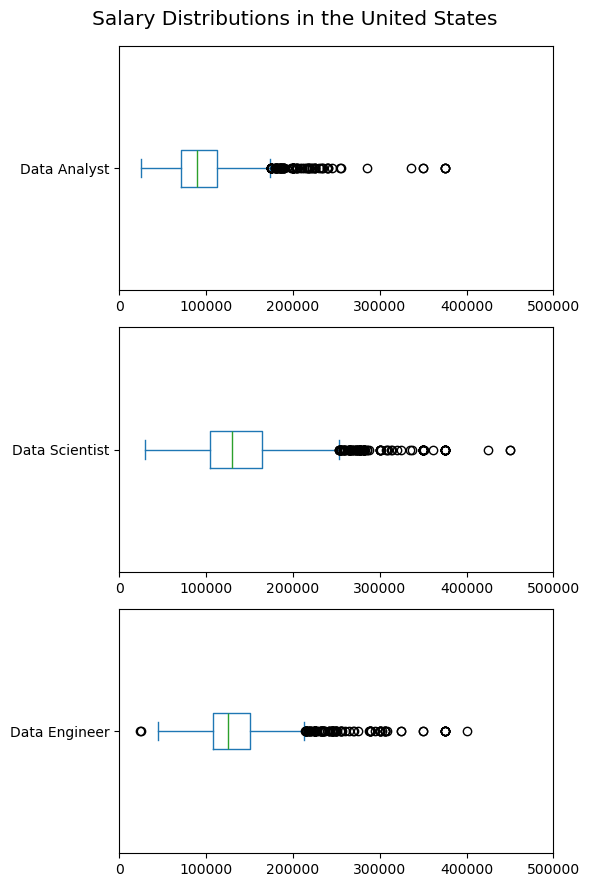

In [66]:
fig, ax = plt.subplots(3,1, figsize=(6,9))

for i, job in enumerate(job_titles):
    df_plot = df_data[df_data['job_title_short'] == job]
    df_plot['salary_year_avg'].plot(kind='box', ax= ax[i], vert=False)
    ax[i].set_xlim(0, 500000)
    ax[i].set_yticklabels([job]) # sets job title as only label on the y axis
                          
fig.tight_layout()
fig.subplots_adjust(top=0.94)
fig.suptitle('Salary Distributions in the United States', fontsize=14.5)

# note: figsize must be passed when creating the figure plt.subplots()

Alternatively, if we want to add all the salary distributions for data analysts, data scientists and data engineers in a single box plot, we can use the following code:

/var/folders/jv/clmqn0155vd65yhxvfy5c4xr0000gn/T/ipykernel_1067/16417467.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


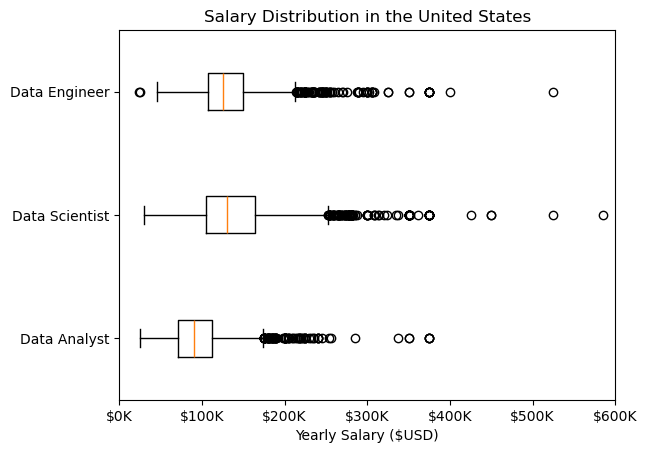

In [70]:
job_list = [df_data[df_data['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# this is an example of list comprehension. The for loop is used to isolate a given salary column belonging to a 
# specific job title.  The relevant series columns are saved in the job_list variable, which is then passed as the
# data to plot. Hence, job_list is a list of series for analysts, scientists and engineers

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax_att = plt.gca()
ax_att.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

#### Interpretation

- Data analysts median salary is just below $100K, with the IQR between $65K and 125K
- Data engineer median salary is approximately $120K, with the IQR extending from around $100K to just over $150K
- Data scientist median salary is jsut below $150K, with the IQR range starting over $100K to ~$175K

- Outliers: Data engineers and data scientists tend to have higher salary ranges and more significant outliers compared to data analysts. This suggests that roles in engineering and science are potentially more lucrative and vary more in compensation 
- Median: The median salaries for data engineers and scientists are higher than for analysts. The spread of salaries (IQR) is also broader for scientists, indicating a wider variance in pay within this role.

In [62]:
practice = df_data[df_data['job_title_short'] == 'Data Analyst']['salary_year_avg']
practice

# this is the loop we used above, which returns a series of all the salaries belonging to data analysts
# in this example

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [65]:
df_data.loc[109]

job_title_short                                               Data Analyst
job_title                            Senior Supply Chain Analytics Analyst
job_location                                                      Anywhere
job_via                                                         via Get.It
job_schedule_type                                                Full-time
job_work_from_home                                                    True
search_location                                    Illinois, United States
job_posted_date                                        2023-10-12 13:02:19
job_no_degree_mention                                                False
job_health_insurance                                                  True
job_country                                                  United States
salary_rate                                                           year
salary_year_avg                                                    89000.0
salary_hour_avg          

In [72]:
practice.describe()

#Note: key stats for box plots can be added using the seaborn library

count      4350.000000
mean      94553.964924
std       33248.650655
min       25000.000000
25%       71262.500000
50%       90000.000000
75%      112500.000000
max      375000.000000
Name: salary_year_avg, dtype: float64